# CDS: Numerical Methods Assignments

- See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord.

- Solutions must be submitted via the Jupyter Hub.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

## Submission

1. Name all team members in the the cell below
2. make sure everything runs as expected
3. **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
4. **run all cells** (in the menubar, select Cell$\rightarrow$Run All)
5. Check all outputs (Out[\*]) for errors and **resolve them if necessary**
6. submit your solutions  **in time (before the deadline)**

## Polynomial Interpolation

In the following you will construct the interpolating polynomial for the pairs $x_k = [2,3,4,5,6]$ and $y_k = [2,5,5,5,6]$ using the "inversion method" via the Vandermonde matrix, as discussed in the lecture.

In [12]:
import numpy as np
import math as m
import scipy.special
from matplotlib import pyplot as plt

### Task 1

Set up the Vandermonde matrix and calculate its determinant using $\text{numpy.linalg.det()}$.

In [20]:
xk = np.array([2,3,4,5,6])
yk = np.array([2,5,5,5,6])
def GetVDMMatrix(xk):
    """Function generates a VDM matrix with the same format as the lecture"""
    VDM = np.vander(xk,len(xk))
    return VDM

In [21]:
# print the Vandermonde matrix here in an appropriate format and calculate the determinant
"""VDM matrix is printed and determinant is calculated"""
print(GetVDMMatrix(xk))

detVDM = np.linalg.det(GetVDMMatrix(xk))
print(detVDM)

[[  16    8    4    2    1]
 [  81   27    9    3    1]
 [ 256   64   16    4    1]
 [ 625  125   25    5    1]
 [1296  216   36    6    1]]
288.0000000000136


In [22]:
"""Check that GetVDMMatrix returns the correct output"""
assert np.allclose( GetVDMMatrix([2.0, 4.0]), [[1.0, 2.0], [1.0, 4.0]] )

AssertionError: 

### Task 2

Write a function that constructs the interpolating polynomial for $\text{x}$ (a user-defined array of $x$ values) using the Vandermonde matrix from the previous task and $\text{numpy.linalg.inv()}$.

In [59]:
def interpVDM(xk, yk, x):
    """Interpolating polynomial is generated with x values and corresponding y_values (xk and yk respectively).
    Returns an array with y values generated using this polynomial corresponding with given input array x"""
    VDM = GetVDMMatrix(xk)
    Invert = np.linalg.inv(VDM)
    a_values = np.matmul(Invert,yk)
    y = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(a_values)):
            y[i] += a_values[len(a_values)-1-j]*(x[i]**j)
    return y

In [60]:
"""Check that interpVDM returns the correct output"""
assert np.allclose( interpVDM([1.0, 3.0], [4.0, 6.0], [2.5]), [5.5] )
assert np.allclose( interpVDM([5.0, 14.0], [12.0, -3.0], [6.5]), [9.5] )

### Task 3

Plot the interpolating polynomial from $x=2$ to $x=6$ using $x$-step-sizes of $0.01$.

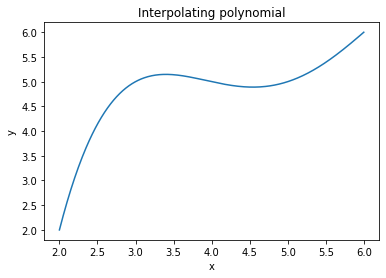

In [64]:
x_values = np.linspace(2,6,400)
def generate_y(x_values):
    """Generates y values to plot by using function interpVDM from previous exercise with corresponding x values"""
    y_values = interpVDM(xk,yk,x_values)
    return y_values
y_values = generate_y(x_values)
    
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolating polynomial")
plt.plot(x_values, y_values)
plt.show()